# Clothes Classification with Neural Networks

In this notebook we are going to use the Neural Networks for image classification. We are going to use the same dataset of Lab 2 on SVM: Fashion MNIST (https://pravarmahajan.github.io/fashion/), a dataset of small images of clothes and accessories.

The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Saccaro

Student name: Lorenzo
    
ID: 1123705

In [1]:
#load the required packages and check Scikit-learn version

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import time

import sklearn
print ('scikit-learn version: ', sklearn.__version__)
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

scikit-learn version:  0.23.1


In [2]:
# helper function to load Fashion MNIST dataset from disk
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

# TODO 
Place a seed for the random generatoryour (you can use your "numero di matricola"). Try to change the seed to see the impact of the randomization.

In [3]:
ID = 1123705
np.random.seed(ID)

In [4]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
X, y = load_mnist("data")
print("Number of samples in the MNIST dataset:", X.shape[0])
# rescale the data
X = X / 255.0

Number of samples in the MNIST dataset: 60000


Now split into training and test. We start with a small training set of 600 samples to reduce computation time while 4000 samples will be used for testing. Make sure that each label is present at least 10 times in train and test set frequencies.

In [5]:
#random permute the data and split into training and test taking the first 600
#data samples as training and 4000 as test set
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

# to have same test set for all experiments

X_train, X_test = X[m_test:m_test+m_training], X[:m_test]
y_train, y_test = y[m_test:m_test+m_training], y[:m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

labelsT, freqsT = np.unique(y_test, return_counts=True)
print("Labels in test set: ", labelsT)
print("Frequencies in test set: ", freqsT)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [63 57 63 54 43 68 65 73 56 58]
Labels in test set:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in test set:  [396 381 421 394 417 365 388 418 425 395]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


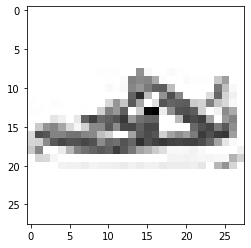

LABEL: 5
INPUT:


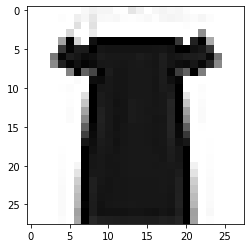

LABEL: 3
INPUT:


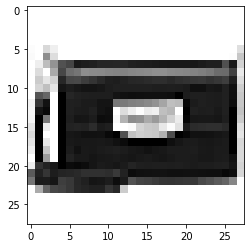

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,10)
plot_input(X_test,y_test,100)
plot_input(X_test,y_test,1000)

### TO DO 1

Now use a feed-forward Neural Network for prediction. Use the multi-layer perceptron classifier, with the following parameters: max_iter=250, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1, random_state=ID (this last parameter ensures the run is the same even if you run it more than once). The alpha parameter is the regularization term.

Then, using the default activation function, pick four or five architectures to consider, with different numbers of hidden layers and different sizes. It is not necessary to create huge neural networks, you can limit to 3 layers and, for each layer, its maximum size can be of 50. Evaluate the architectures you chose using GridSearchCV with cv=5.

You can reduce the number of iterations if the running time is too long on your computer.


In [8]:
# these are sample values but feel free to change them as you like, try to experiment with different sizes!!
#parameters = {'hidden_layer_sizes': [(10,), (20,), (30,), (20,20,), (30,30,20), (30,20), (25,), (30,20,10)]}

sing_layer = [(i,) for i in range (10,51,5)]
dual_layer = [(i,j) for i in range(10,51,10) for j in range(10,51,10)]
triple_layer = [(i,j,k) for i in range(10,51,10) for j in range(10,51,10) for k in range (10,51,10)] 
par_list = sing_layer + dual_layer + triple_layer

parameters = {'hidden_layer_sizes': par_list}

mlp = MLPClassifier(max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

NN_arch_search = GridSearchCV(mlp,param_grid=parameters,n_jobs=-1,cv=5)
NN_arch_search.fit(X_train,y_train)

results = pd.DataFrame(NN_arch_search.cv_results_)
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(NN_arch_search.best_params_)

print("Score with best parameters:")
print(NN_arch_search.best_score_)


# save best_archs for TODO 3
best_archs = []
print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    if val[1] >= 0.8:
        best_archs.append(val[0]['hidden_layer_sizes'])
    print("parameters:",val[0], "score: {:.4f}".format(val[1]))


RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (40,)}
Score with best parameters:
0.8066666666666666
All scores on the grid:
parameters: {'hidden_layer_sizes': (10,)} score: 0.7683
parameters: {'hidden_layer_sizes': (15,)} score: 0.7867
parameters: {'hidden_layer_sizes': (20,)} score: 0.7983
parameters: {'hidden_layer_sizes': (25,)} score: 0.8033
parameters: {'hidden_layer_sizes': (30,)} score: 0.7900
parameters: {'hidden_layer_sizes': (35,)} score: 0.7967
parameters: {'hidden_layer_sizes': (40,)} score: 0.8067
parameters: {'hidden_layer_sizes': (45,)} score: 0.7917
parameters: {'hidden_layer_sizes': (50,)} score: 0.7983
parameters: {'hidden_layer_sizes': (10, 10)} score: 0.5150
parameters: {'hidden_layer_sizes': (10, 20)} score: 0.6083
parameters: {'hidden_layer_sizes': (10, 30)} score: 0.6600
parameters: {'hidden_layer_sizes': (10, 40)} score: 0.6467
parameters: {'hidden_layer_sizes': (10, 50)} score: 0.6417
parameters: {'hidden_layer_sizes': (20, 10)} score: 0.746

### TO DO 2

Now try also different batch sizes, while keeping the best NN architecture you have found above. Remember that the batch size was previously set to the default value, i.e., min(200, n_samples). 
Recall that a batch size of 1 corresponds to baseline SGD, while using all the 480 training samples (there are 600 samples but in cross validation with 5 folders we use 1/5 of them for validation at each round) corresponds to standard GD and using a different mini-batch size lies in the middle between the two extreme cases.

In [9]:
# these are sample values corresponding to baseline SGD, a reasonable mini-batch size and standard GD
# again feel free to change them as you like, try to experiment with different batch sizes!!
#parameters = {'batch_size': [1, 32, 480]}

par_list = [1] + list(range(32,481,8))
parameters = {'batch_size': par_list}

best_layer_size = NN_arch_search.best_params_.get('hidden_layer_sizes')

mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, max_iter=250, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.1)

# need to specify that you would like to use the standard k-fold split otherwise sklearn create splits of different sizes
kf = sklearn.model_selection.KFold(n_splits=5)

# recall to use cv=kf to use the k-fold subdivision seen in the lectures

NN_batch_search = GridSearchCV(mlp,param_grid=parameters,n_jobs=-1,cv=kf)
NN_batch_search.fit(X_train,y_train)

results = pd.DataFrame(NN_batch_search.cv_results_)
print ('RESULTS FOR NN\n')

print("Best parameters set found:")
print(NN_batch_search.best_params_)

print("Score with best parameters:")
print(NN_batch_search.best_score_)

print("All scores on the grid:")
for val in results[["params","mean_test_score"]].values:
    print("parameters:",val[0], "score: {:.4f}".format(val[1]))

RESULTS FOR NN

Best parameters set found:
{'batch_size': 264}
Score with best parameters:
0.8033333333333335
All scores on the grid:
parameters: {'batch_size': 1} score: 0.1050
parameters: {'batch_size': 32} score: 0.7667
parameters: {'batch_size': 40} score: 0.7900
parameters: {'batch_size': 48} score: 0.8017
parameters: {'batch_size': 56} score: 0.8017
parameters: {'batch_size': 64} score: 0.7867
parameters: {'batch_size': 72} score: 0.7983
parameters: {'batch_size': 80} score: 0.7883
parameters: {'batch_size': 88} score: 0.7850
parameters: {'batch_size': 96} score: 0.7933
parameters: {'batch_size': 104} score: 0.7917
parameters: {'batch_size': 112} score: 0.8000
parameters: {'batch_size': 120} score: 0.7933
parameters: {'batch_size': 128} score: 0.8017
parameters: {'batch_size': 136} score: 0.8033
parameters: {'batch_size': 144} score: 0.8000
parameters: {'batch_size': 152} score: 0.8017
parameters: {'batch_size': 160} score: 0.7933
parameters: {'batch_size': 168} score: 0.8017
par

### QUESTION 1

What do you observe for different architectures and batch sizes? How do the number of layers and their sizes affect the performances? What do you observe for different batch sizes, in particular what happens to the training convergence for different batch sizes (notice that the algorithm could not converge for some batch sizes)?

In general, for this problem, single layer ad dual layers NN have the best scores (with the exception of the dual-layer ones with the smaller numbers of neurons) while triple layer NN performance is poor in the majority of cases. Excluding the case for pure sgd (batch size = 1), scores are very similar to each other. For this seed (and a for a couple more tried)  the optimization reaches convergence for all batch_sizes  (the learning rate is very high at 0.1) also the number of training samples is very small. 

## [ANSWER TO QUESTION 1]

### TODO 3:

Plot the train and test accuracies as a function of the number of learnable parameters in your neural network. Print also the computation time for the various configurations you try (the code for getting the computation time is already provided). You can use 300 iterations (if you get a warning on convergence not reached it is not an issue for this lab)

Training MLP of size (10,) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.82 sec

Training MLP of size (20,) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.98 sec

Training MLP of size (20, 20) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.12 sec

Training MLP of size (25,) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 0.98 sec

Training MLP of size (30,) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.05 sec

Training MLP of size (30, 20) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.23 sec

Training MLP of size (30, 20, 10) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.34 sec

Training MLP of size (30, 30, 20) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.49 sec

Training MLP of size (40,) ...


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Done, training time: 1.23 sec

Training MLP of size (50, 40) ...
Done, training time: 1.54 sec



C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


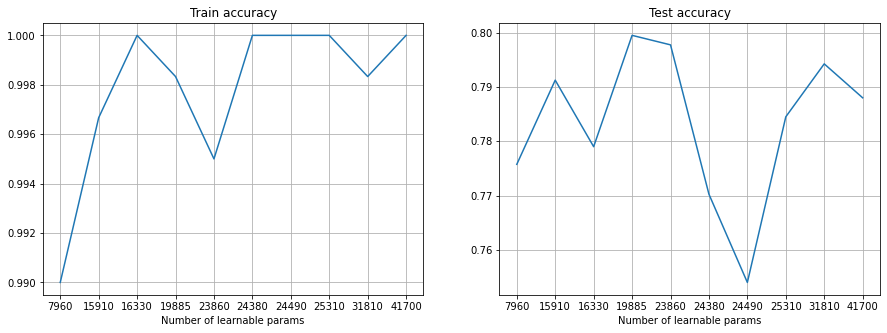

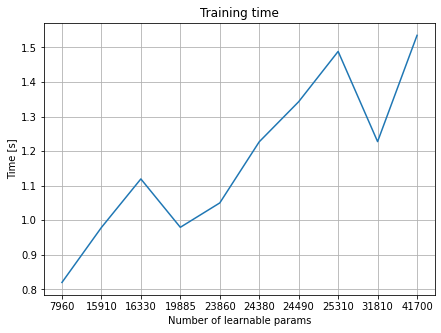

In [10]:
import time
from functools import reduce

best_batch_size = NN_batch_search.best_params_.get('batch_size')

# Function to compute the number of learnable parameters of a mlp given the size of its hidden layers
def param_count(hl_size):
    tot = 0
    input_size, output_size = X_train.shape[1], len(labels)
    tot += (input_size+1)*hl_size[0]
    for i in range(1,len(hl_size)):
        tot += (hl_size[i-1]+1)*hl_size[i]
    tot += (hl_size[-1]+1)*output_size
    return tot

hl_sizes = [(10,), (20,), (30,), (20,20,), (30,30,20), (30,20), (30,20,10)] + best_archs
hl_sizes.sort(key=lambda tup:param_count(tup)) # to sort correctly for increasing size
hl_labels = [param_count(t) for t in hl_sizes]

ti = time.time()
train_acc_list, test_acc_list, times_list = [], [], []
for hl_size in hl_sizes:
    print('Training MLP of size {} ...'.format(hl_size))
    #changed learnig rate to have more meaningful results on training time
    mlp = MLPClassifier(hidden_layer_sizes=hl_size, batch_size=best_batch_size, max_iter=300, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=.01)
    mlp.fit(X_train,y_train)
    #ADD YOUR CODE
    
    train_acc_list.append(mlp.score(X_train, y_train))
    test_acc_list.append(mlp.score(X_test, y_test))
    elapsed_time = time.time()-ti
    print('Done, training time: {:.2f} sec\n'.format(elapsed_time))
    times_list.append(elapsed_time)
    ti = time.time()

fig, ax = plt.subplots(1,2, figsize=(15,5))


ax[0].plot(train_acc_list)
ax[0].set_xlabel('Number of learnable params')
ax[0].set_title('Train accuracy')
ax[0].set_xticks(np.arange(0,len(hl_labels)))
ax[0].set_xticklabels(hl_labels)
ax[0].grid(True)

ax[1].plot(test_acc_list)
ax[1].set_xlabel('Number of learnable params')
ax[1].set_title('Test accuracy')
ax[1].set_xticks(np.arange(0,len(hl_labels)))
ax[1].set_xticklabels(hl_labels)
ax[1].grid(True)

fig2, ax2 = plt.subplots(figsize=(7,5))

ax2.plot(times_list)
ax2.set_xlabel('Number of learnable params')
ax2.set_ylabel('Time [s]')
ax2.set_title('Training time')
ax2.set_xticks(np.arange(0,len(hl_labels)))
ax2.set_xticklabels(hl_labels)
ax2.grid(True)


## Question 2:

Comment about the training and test accuracies referring to the discussion on underfitting and overfitting we did in the course

Train accuracy is expected to grow while increasing the number of parameters and that is what is seen in the first graph (with some oscillation due to some architecture performing poorlier than others) 
On the other hand, test accuracy first improves increasing the complexity of the NN but then dips again when the number of parameters gets too large. 

This shows the underfitting/overfitting problem: too few parameters can't accurately predict the output while using too many leads to an excellent fit of the training data, but poor generalization capabilities. 

As for the training time, as expected (with some fluctuations), it tends to increase with the number of learnable parameters. 

The idea is to select a model that balances train/test accuracy and has a reasonable training time given the computational power available.

## [ANSWER TO QUESTION 2]

### TO DO 4

Now try also to use different learning rates, while keeping the best NN architecture and batch size you have found above. Plot the learning curves (i.e., the variation of the loss over the steps, you can get it from the loss_curve_ object of sklearn) for the different values of the learning rate. Try to run each training for 600 iterations. 

C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


RESULTS FOR NN

{'learning rate: 0.001': 0.905, 'learning rate: 0.01': 1.0, 'learning rate: 0.1': 1.0}


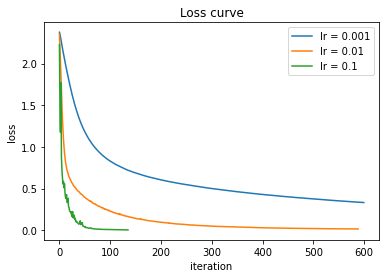

In [11]:
import matplotlib.pyplot as plt
import operator

#lr_list = [0.001, 0.01, 0.1]
lr_list = [10**exp for exp in range(-3,0)]
scores = {}

for lr in lr_list:
    mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, batch_size=best_batch_size, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=lr)
    mlp.fit(X_train,y_train)
    scores.update({'learning rate: {}'.format(lr): mlp.score(X_train,y_train)})
    plt.plot(mlp.loss_curve_, label='lr = {}'.format(lr))
    plt.title("Loss curve")
    plt.xlabel("iteration")
    plt.ylabel("loss")
    plt.legend()
    

print ('RESULTS FOR NN\n')
print(scores)



### QUESTION 3

Comment about the learning curves (i.e. the variation of the loss over the steps). How does the curve changes for different learning rates in terms of stability and speed of convergence ?

With learning rate = 0.001, the loss curve is very smooth (there are no "bumps") but convergence is very slow and, actually, optimization is not finished with 600 iterations (see warning). The curve corresponding to lr = 0.01 has the fastest convergence speed (achieved after around 150 iterations) but some it is not very stable. The best, all-around, behavior is that of lr = 0.01: the curve looks almost (except for some very small "bumps") as smooth as the on for lr = 0.001, but in this case, convergence is faster and actually achieved.  

## [ANSWER TO QUESTION 3]

### TO DO 5

Now get training and test error for a NN with best parameters (architecture, batch size and learning rate) from above. Plot the learning curve also for this case.


RESULTS FOR BEST NN

Best NN training error: 0.000000
Best NN test error: 0.207000


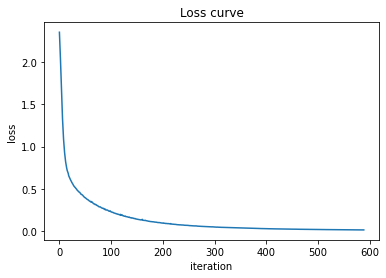

In [12]:
#get training and test error for the best NN model from CV

#ADD YOUR CODE
mlp = MLPClassifier(hidden_layer_sizes=best_layer_size, batch_size=best_batch_size, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.01)

mlp.fit(X_train,y_train)
print ('\nRESULTS FOR BEST NN\n')


training_error = 1 - mlp.score(X_train,y_train)
test_error = 1 - mlp.score(X_test,y_test)
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

#ADD YOUR CODE FOR PLOTTING
plt.plot(mlp.loss_curve_)
plt.title("Loss curve")
plt.xlabel("iteration")
plt.ylabel("loss");

## More data 
Now let's do the same but using 4000 (or less if it takes too long on your machine) data points for training. Use the same NN architecture as before, but you can try more if you like and have a powerful computer!!

In [13]:
X = X[permutation]
y = y[permutation]

m_training = 4000

X_train, X_test = X[m_test:m_test+m_training], X[:m_test]
y_train, y_test = y[m_test:m_test+m_training], y[:m_test]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [364 391 400 414 397 422 357 394 445 416]


### TO DO 6

Now train the NNs with the added data points using the optimum parameters found above. Eventually, feel free to try different architectures if you like. We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration (eventually reduce also the number of iterations to 50).


RESULTS FOR BEST NN

Best NN training error: 0.000500
Best NN test error: 0.169500


C:\Users\loren\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


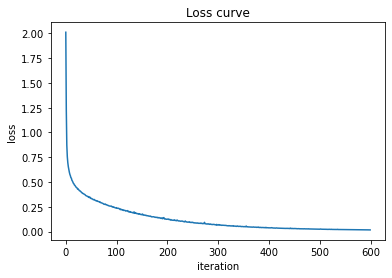

In [14]:
# use best architecture and params from before

mlp_large = MLPClassifier(hidden_layer_sizes=best_layer_size, batch_size=best_batch_size, max_iter=600, alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=ID,
                    learning_rate_init=0.01)

mlp_large.fit(X_train,y_train)
print ('\nRESULTS FOR BEST NN\n')


training_error = 1 - mlp_large.score(X_train,y_train)
test_error = 1 - mlp_large.score(X_test,y_test)
print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)
plt.plot(mlp_large.loss_curve_)
plt.title("Loss curve")
plt.xlabel("iteration")
plt.ylabel("loss");

## QUESTION 4
Compare the train and test error you got with a large number of samples with the best one you obtained with only 600 data points. Comment about the results you obtained.

With m = 600 all training samples are correctly classified thus train_err = 0.  When increasing m to 4000,  after 600 iterations, the optimization doesn't converge and the train_err  is > 0.  As expected, the large_NN performs better when used on the test_set. 

Some other results, increasing m_training are:
5000 -> 0.154 7000-> 0.153 10000-> 0.153

Trying with different seeds, results for m=4000 are usually in the range 0.175 - 0.165. 

Increasing the max number of iterations for m=4000 lets the optimizer converge: this produces a marginal improvement in the test score too. 

#### [ANSWER TO QUESTION 4]

### TO DO 7

Plot an example that was missclassified by NN with m=600 training data points and it is now instead correctly classified by NN with m=4000 training data points.

In [15]:
NN_prediction = mlp.predict(X_test)
large_NN_prediction = mlp_large.predict(X_test)
        

INPUT:


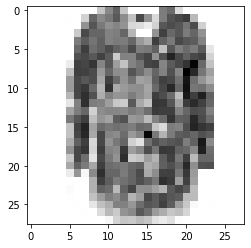

LABEL: 6
index selected: 16
label predicted by NN: 2
label predicted by large NN: 6


In [16]:
index_bad_good = 0
while not (large_NN_prediction[index_bad_good]==y_test[index_bad_good] and not NN_prediction[index_bad_good]==y_test[index_bad_good]):
    index_bad_good +=1
    
plot_input(X_test,y_test,index_bad_good)
print("index selected:", index_bad_good)
print("label predicted by NN:", NN_prediction[index_bad_good])
print("label predicted by large NN:", large_NN_prediction[index_bad_good])

### TO DO 8

Let's plot the weigths of the multi-layer perceptron classifier, for the best NN we get with 600 data points and with 4000 data points. The code is already provided, just fix variable names (e.g., replace mlp , mlp_large with your estimators) in order to have it working with your implementation



Weights with 600 data points:


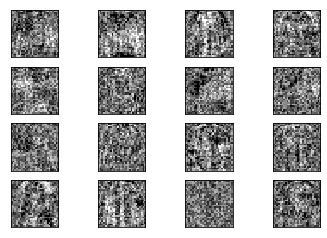

Weights with 4000 data points:


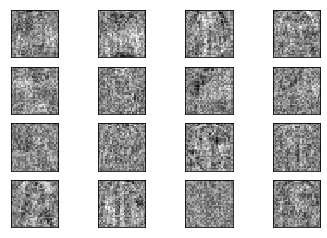

In [17]:
print("Weights with 600 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

print("Weights with 4000 data points:")

fig, axes = plt.subplots(4, 4)
vmin, vmax = mlp_large.coefs_[0].min(), mlp_large.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
plt.show()

## QUESTION 5

Describe what do you observe by looking at the weights.

In some cases, it is difficult to see something other than noise while in a few plots it is possible to identify the shape of a shirt or dress. 

##### [ANSWER TO QUESTION 5]

### TO DO 9

Take the best SVM model and its parameters, you found in the last notebook. Fit it on a few data points and compute its training and test scores. Then fit also a logistic regression model with C=1. 

In [18]:
m_training = 4000

# to use same train and test set
X_train, X_test = X[m_training:2*m_training], X[:m_training]
y_train, y_test = y[m_training:2*m_training], y[:m_training]

# use best parameters found in the SVM notebook, create SVM and perform fitting

#ADD YOUR CODE
SVM = SVC(kernel='rbf', C=5, gamma=0.005, break_ties=True) 
SVM.fit(X_train,y_train)
print ('RESULTS FOR SVM')

SVM_training_error =  1-SVM.score(X_train,y_train)#ADD YOUR CODE

print("Training error SVM:")
print(SVM_training_error)

SVM_test_error = 1-SVM.score(X_test,y_test)
print("Test error SVM:")
print(SVM_test_error)

RESULTS FOR SVM
Training error SVM:
0.06474999999999997
Test error SVM:
0.13949999999999996


In [19]:
from sklearn import linear_model

regL2 = linear_model.LogisticRegression(C=1, max_iter=100, n_jobs=-1)
regL2.fit(X_train,y_train)
# you can re-use your code from Lab 2

#ADD YOUR CODE

print ('\nRESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION')

training_error = 1-regL2.score(X_train,y_train)
test_error = 1-regL2.score(X_test,y_test)

print ("Training error (reg): %f" % training_error)
print ("Test error (reg): %f" % test_error)


RESULTS FOR LOGISTIC REGRESSION WITH REGULARIZATION
Training error (reg): 0.057250
Test error (reg): 0.172500


## QUESTION 6
Compare the results of Logistic Regression, SVM and NN. Which one achieve the best results? 

###### [ANSWER TO QUESTION 6]

The best result is achieved by the SVM, then NN while LR is last.
Trying with different seeds the result is always the same: SVM > NN > LR.

A couple of considerations on NN performance:

1) in the first part when selecting the best NN architecture a more numerous training sample should be used: the results are very sensitive to the random selection of the training sample and a larger one should help in this regard.

2) the model we are implementing is very simple and we are not using any advanced technique for optimization, model architecture, etc. As seen in the keras tutorial a CNN is better suited for tackling this kind of classification problem.